In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Example: Load your dataset
# Replace 'data.csv' with your actual filename
df = pd.read_csv('split_by_clusters/cluster_2.csv')
df

,user_number,datetime,Consommation,cluster
0,5,2016-03-01 01:57:10,3,2
1,5,2016-03-01 02:57:06,0,2
2,5,2016-03-01 03:57:06,0,2
3,5,2016-03-01 04:57:06,0,2
4,5,2016-03-01 05:57:06,0,2
...,...,...,...,...
288548,92,2017-02-28 18:08:01,0,2
288549,92,2017-02-28 19:08:06,0,2
288550,92,2017-02-28 20:08:06,27,2
288551,92,2017-02-28 21:08:06,43,2


Add Anomalies (anomalie and type Columns)

In [51]:
# Add the 'anomalie' column initialized to 0
df['anomalie'] = 0
df['type'] = None

In [52]:
df


,user_number,datetime,Consommation,cluster,anomalie,type
0,5,2016-03-01 01:57:10,3,2,0,None
1,5,2016-03-01 02:57:06,0,2,0,None
2,5,2016-03-01 03:57:06,0,2,0,None
3,5,2016-03-01 04:57:06,0,2,0,None
4,5,2016-03-01 05:57:06,0,2,0,None
...,...,...,...,...,...,...
288548,92,2017-02-28 18:08:01,0,2,0,None
288549,92,2017-02-28 19:08:06,0,2,0,None
288550,92,2017-02-28 20:08:06,27,2,0,None
288551,92,2017-02-28 21:08:06,43,2,0,None


Retour d'eau anomaly

In [111]:

# Sélectionner l'utilisateur spécifique
user_id = 8045

# Filtrer les données de l'utilisateur 10
user_10 = df[df['user_number'] == user_id]
user_10
# Créer une copie du DataFrame normal
df_anormal = user_10[user_10['anomalie'] == 0].copy()

In [117]:
import numpy as np
import pandas as pd

# Conversion et nettoyage de la colonne datetime
df_anormal['datetime'] = pd.to_datetime(df_anormal['datetime'], errors='coerce', dayfirst=True)

# Supprimer les lignes avec des dates invalides si nécessaire
df_anormal = df_anormal.dropna(subset=['datetime'])

# Nombre d'anomalies à ajouter
num_anomalies =1

# Trouver les indices où la consommation est égale à 50 ou 70
anomaly_indices = df_anormal[df_anormal['Consommation'].isin([50, 70])].index

# Si le nombre d'anomalies souhaité est supérieur au nombre d'anomalies disponibles, on réduit à la taille disponible
num_anomalies = min(num_anomalies, len(anomaly_indices))

# Sélectionner aléatoirement les indices où l'on va ajouter des anomalies
selected_anomaly_indices = np.random.choice(anomaly_indices, size=num_anomalies, replace=False)

# Durée de l'anomalie en jours (par exemple, 2 jours)
anomaly_duration = pd.Timedelta(days=1)

# Ajouter les anomalies
for idx in selected_anomaly_indices:
    # Identifier la plage de deux jours autour de l'indice
    anomaly_start = df_anormal.loc[idx, 'datetime']
    anomaly_end = anomaly_start + anomaly_duration
    
    # Sélectionner les lignes dans cette plage
    anomaly_range = (df_anormal['datetime'] >= anomaly_start) & (df_anormal['datetime'] < anomaly_end)
    
    # Inverser les valeurs de consommation pour cette plage
    df_anormal.loc[anomaly_range, 'Consommation'] = -df_anormal.loc[anomaly_range, 'Consommation']-70
    
    # Marquer ces lignes comme anomalies et définir le type d'anomalie
    df_anormal.loc[anomaly_range, ['anomalie', 'type']] = [1, 'prb de retour d/eau']

# Afficher les anomalies ajoutées
print(df_anormal[df_anormal['anomalie'] == 1][['datetime', 'Consommation', 'anomalie', 'type']])


                  datetime  Consommation  anomalie                 type
156113 2016-08-04 19:27:09          -120         1  prb de retour d/eau
156114 2016-08-04 20:27:09          -153         1  prb de retour d/eau
156115 2016-08-04 21:27:09           -70         1  prb de retour d/eau
156116 2016-08-04 22:27:09           -70         1  prb de retour d/eau
156117 2016-08-04 23:27:21           -84         1  prb de retour d/eau
...                    ...           ...       ...                  ...
158223 2016-01-12 21:24:14          -120         1  prb de retour d/eau
158224 2016-01-12 22:24:07           -97         1  prb de retour d/eau
158225 2016-01-12 23:24:07           -82         1  prb de retour d/eau
159061 2017-12-02 22:24:06          -120         1  prb de retour d/eau
159062 2017-12-02 23:24:06           -71         1  prb de retour d/eau

[102 rows x 4 columns]


In [118]:
# Modifier la colonne user_number dans df_anormal
df_anormal['user_number'] = 8045

# Ajouter les données modifiées à df2
df2 = pd.concat([df, df_anormal], ignore_index=True)

# Exporter le DataFrame final vers un fichier CSV
df2.to_csv('Fianl2.csv', index=False)  # index=False pour ne pas inclure l'index dans le fichier CSV

# Confirmation de l'exportation
print("Les données modifiées ont été ajoutées et exportées vers 'cluster0_anomalie.csv'.")


Les données modifiées ont été ajoutées et exportées vers 'cluster0_anomalie.csv'.


Fuite de consommation

In [119]:
import pandas as pd
import numpy as np
df = pd.read_csv('Final2.csv')  # Remplace par le chemin réel de ton fichier

# Sélectionner les données de l'utilisateur 60
user_id = 8045
user_60 = df[df['user_number'] == user_id].copy()

# Convertir la colonne datetime en format datetime si ce n'est pas déjà fait
user_60['datetime'] = pd.to_datetime(user_60['datetime'], errors='coerce')
user_60['datetime'] = pd.to_datetime(user_60['datetime'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


# Créer une copie de user_60 pour ajouter l'anomalie (user_60_anomaly)
user_60_anomaly = user_60.copy()

# Définir les paramètres de l'anomalie
anomaly_gap = 1500  # Valeur de la fuite à ajouter

# Sélectionner un jour aléatoire parmi les dates disponibles
random_date = np.random.choice(user_60['datetime'].dt.date.unique(), size=1, replace=False)[0]

# Appliquer l'anomalie pour le jour sélectionné et les deux jours suivants
for day_offset in range(0, 3):  # 3 jours successifs
    selected_date = random_date + pd.Timedelta(days=day_offset)  # Calculer la date successive
    
    # Appliquer l'anomalie sur toutes les lignes de ces jours successifs
    condition = user_60_anomaly['datetime'].dt.date == selected_date  # Trouver les lignes correspondant à cette date
    user_60_anomaly.loc[condition, 'Consommation'] += anomaly_gap  # Ajouter le gap de consommation
    user_60_anomaly.loc[condition, 'anomalie'] = 1  # Marquer comme anomalie
    user_60_anomaly.loc[condition, 'type'] = 'Fuite de consommation'  # Type d'anomalie

# Afficher les anomalies ajoutées

anomalies = user_60_anomaly['anomalie'] == 1  # Condition pour filtrer les anomalies
print(user_60_anomaly.loc[anomalies, ['datetime', 'Consommation', 'anomalie', 'type']])


                  datetime  Consommation  anomalie                   type
155913 2016-03-12 11:27:31          1021         1        Surconsommation
156112 2016-04-08 18:27:11          1021         1        Surconsommation
156811 2016-07-02 21:26:13          1090         1        Surconsommation
156873 2016-07-05 11:26:08          1046         1        Surconsommation
157625 2016-09-12 23:25:09          1010         1        Surconsommation
...                    ...           ...       ...                    ...
186777 2016-12-07 20:24:16          1501         1  Fuite de consommation
186778 2016-12-07 21:24:16          1547         1  Fuite de consommation
186779 2016-12-07 22:24:13          1500         1  Fuite de consommation
186780 2016-12-07 23:24:13          1537         1  Fuite de consommation
187298 2017-02-05 15:23:38          1032         1        Surconsommation

[205 rows x 4 columns]


In [120]:
# Modifier la colonne user_number dans df_anormal
user_60_anomaly['user_number'] = 8045

# Ajouter les données modifiées à df2
df2 = pd.concat([df, user_60_anomaly], ignore_index=True)

# Exporter le DataFrame final vers un fichier CSV
df2.to_csv('Final2.csv', index=False)  # index=False pour ne pas inclure l'index dans le fichier CSV

# Confirmation de l'exportation
print("Les données modifiées ont été ajoutées et exportées vers 'Final2.csv'.")


Les données modifiées ont été ajoutées et exportées vers 'Final2.csv'.


Prb compteur anomaly

In [145]:
import numpy as np
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('Final2.csv')  # Remplace par le chemin réel de ton fichier

# Sélectionner l'utilisateur spécifique
user_id = 77
# Filtrer les données de l'utilisateur spécifique
user_10 = df[df['user_number'] == user_id].copy()

# Conversion de la colonne datetime en format datetime
user_10['datetime'] = pd.to_datetime(user_10['datetime'], errors='coerce')

# Créer une copie pour les anomalies
df_anormal = user_10.copy()

# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Nettoyage de la colonne datetime
df_anormal['datetime'] = pd.to_datetime(df_anormal['datetime'], errors='coerce', dayfirst=True)

# Supprimer les lignes avec des dates invalides si nécessaire
df_anormal = df_anormal.dropna(subset=['datetime'])

# Durée de l'anomalie en jours (par exemple, 2 jours)
anomaly_duration = pd.Timedelta(days=2)

# Nombre d'anomalies à ajouter
num_anomalies = 9  # Exemple : 2 anomalies

# Trouver les indices où la consommation est élevée
anomaly_indices = df_anormal[df_anormal['Consommation'] >= 10].index

# Si le nombre d'anomalies souhaité est supérieur au nombre d'anomalies disponibles, on réduit à la taille disponible
num_anomalies = min(num_anomalies, len(anomaly_indices))

# Sélectionner aléatoirement les indices où l'on va ajouter des anomalies
selected_anomaly_indices = np.random.choice(anomaly_indices, size=num_anomalies, replace=False)

# Ajouter les anomalies instantanées
for idx in selected_anomaly_indices:
    # Appliquer un pic négatif instantané
    df_anormal.loc[idx, 'Consommation'] = -abs(df_anormal.loc[idx, 'Consommation'])-60
    # Marquer cette ligne comme anomalie et définir le type d'anomalie
    df_anormal.loc[idx, ['anomalie', 'type']] = [1, 'prb de compteur']

# Afficher les anomalies ajoutées
print(df_anormal[df_anormal['anomalie'] == 1][['datetime', 'Consommation', 'anomalie', 'type']])


                 datetime  Consommation  anomalie             type
87808 2016-03-01 13:07:10           -89         1  prb de compteur
87830 2016-03-02 19:07:03           -75         1  prb de compteur
87939 2016-03-08 00:06:49           -77         1  prb de compteur
87998 2016-03-10 23:06:41           -83         1  prb de compteur
88120 2016-04-04 01:06:09           -75         1  prb de compteur
88153 2016-04-05 10:05:54           -70         1  prb de compteur
88295 2016-04-12 00:05:24          -162         1  prb de compteur
89503 2016-09-09 13:59:22           -70         1  prb de compteur
89898 2016-11-05 12:57:03           -95         1  prb de compteur


In [146]:
# Modifier le numéro d'utilisateur (par exemple, en ajoutant un préfixe ou une valeur différente)
df_anormal['user_number'] =1037 # Changer le numéro d'utilisateur pour les données modifiées (par exemple 99999)

# Concaténer user_60_anomaly avec le DataFrame d'origine (df)
df_combined = pd.concat([ df ,df_anormal ])

# Enregistrer le DataFrame combiné dans un fichier CSV
df_combined.to_csv('Final2.csv', index=False)

Surconsommation anomaly

In [1]:
import numpy as np
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('data/clean_data.csv')  # Remplace par le chemin réel de ton fichier

# Sélectionner l'utilisateur spécifique
user_id =10
# Filtrer les données de l'utilisateur spécifique
user_10 = df[df['user_number'] == user_id].copy()

# Conversion de la colonne datetime en format datetime
user_10['datetime'] = pd.to_datetime(user_10['datetime'], errors='coerce')

# Créer une copie pour les anomalies
df_anormal = user_10.copy()

# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Nettoyage de la colonne datetime
df_anormal['datetime'] = pd.to_datetime(df_anormal['datetime'], errors='coerce', dayfirst=True)

# Supprimer les lignes avec des dates invalides si nécessaire
df_anormal = df_anormal.dropna(subset=['datetime'])

# Durée de l'anomalie en jours (par exemple, 2 jours)
anomaly_duration = pd.Timedelta(days=2)

# Nombre d'anomalies à ajouter
num_anomalies = 9  # Exemple : 2 anomalies

# Trouver les indices où la consommation est élevée
anomaly_indices = df_anormal[df_anormal['Consommation'] >= 10].index

# Si le nombre d'anomalies souhaité est supérieur au nombre d'anomalies disponibles, on réduit à la taille disponible
num_anomalies = min(num_anomalies, len(anomaly_indices))

# Sélectionner aléatoirement les indices où l'on va ajouter des anomalies
selected_anomaly_indices = np.random.choice(anomaly_indices, size=num_anomalies, replace=False)

# Ajouter les anomalies instantanées
for idx in selected_anomaly_indices:
    # Appliquer un pic négatif instantané
    df_anormal.loc[idx, 'Consommation'] = abs(df_anormal.loc[idx, 'Consommation'])+1000
    # Marquer cette ligne comme anomalie et définir le type d'anomalie
    df_anormal.loc[idx, ['anomalie', 'type']] = [1, 'Surconsommation']

# Afficher les anomalies ajoutées
print(df_anormal[df_anormal['anomalie'] == 1][['datetime', 'Consommation', 'anomalie', 'type']])
 

                 datetime  Consommation  anomalie             type
69253 2016-04-03 17:14:18          1082       1.0  Surconsommation
69781 2016-04-04 10:44:14          1275       1.0  Surconsommation
70323 2016-02-05 08:11:33          1068       1.0  Surconsommation
71085 2016-11-06 10:09:35          1018       1.0  Surconsommation
71565 2016-04-07 14:08:38          1022       1.0  Surconsommation
71661 2016-08-07 18:08:17          1014       1.0  Surconsommation
71712 2016-11-07 09:08:09          1032       1.0  Surconsommation
72141 2016-04-08 10:07:01          1075       1.0  Surconsommation
73448 2016-11-10 09:03:48          1010       1.0  Surconsommation


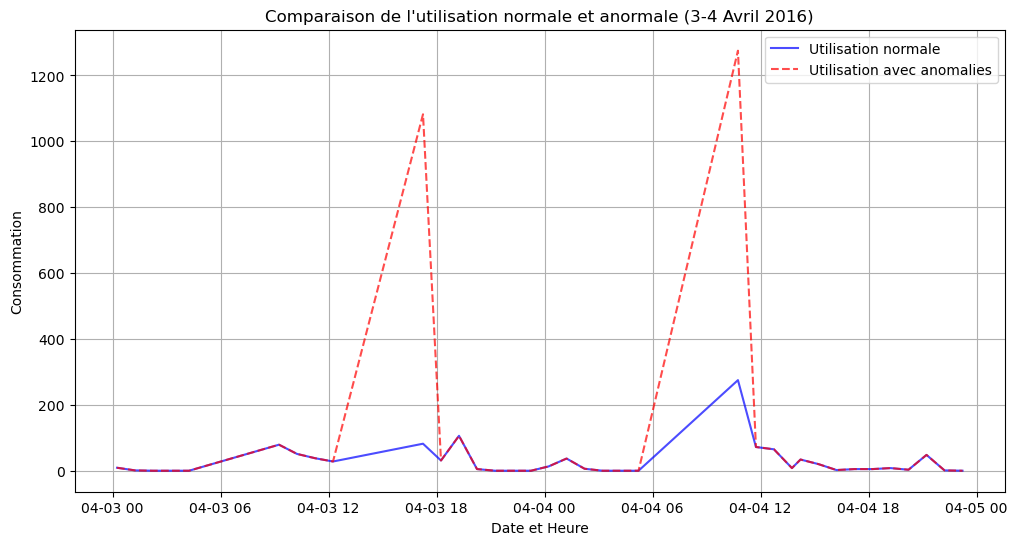

In [3]:
# Filtrer les jours spécifiques pour les anomalies
dates_anomalies = pd.to_datetime(['2016-04-03', '2016-04-04'])

# Filtrer les données normales pour ces jours
user_10_filtered = user_10[user_10['datetime'].dt.date.isin(dates_anomalies.date)]

# Filtrer les données avec anomalies pour ces jours
df_anormal_filtered = df_anormal[df_anormal['datetime'].dt.date.isin(dates_anomalies.date)]

# Tracer les données normales et anormales
plt.figure(figsize=(12, 6))

# Courbe d'utilisation normale
plt.plot(
    user_10_filtered['datetime'], 
    user_10_filtered['Consommation'], 
    label='Utilisation normale', 
    color='blue', 
    alpha=0.7
)

# Courbe d'utilisation anormale
plt.plot(
    df_anormal_filtered['datetime'], 
    df_anormal_filtered['Consommation'], 
    label='Utilisation avec anomalies', 
    color='red', 
    linestyle='--',
    alpha=0.7
)

# Ajouter des titres et légendes
plt.title("Comparaison de l'utilisation normale et anormale (3-4 Avril 2016)")
plt.xlabel("Date et Heure")
plt.ylabel("Consommation")
plt.legend()
plt.grid(True)
plt.show()
